In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/Users/Wisani/Desktop/INF791-ASSIGN4/2ndTrial/Accident _Dataset (1) (2).xlsx'
df = pd.read_excel(file_path)

In [2]:
# Step 1: Handle Missing Data
for column in df.columns:
    if df[column].dtype == 'object':
        # Fill missing values for categorical columns with the mode
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Fill missing values for numerical columns with the median
        df[column].fillna(df[column].median(), inplace=True)

# Display the DataFrame after handling missing data
print("DataFrame after handling missing values:")
print(df.head())

DataFrame after handling missing values:
       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3  01:06:00      Sunday              18-30          Male  Junior high school   
4  01:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr           Automobile   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movemen

/var/folders/g6/ddsw85fs74l44cyy37jg6t640000gn/T/ipykernel_10205/3367316777.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
/var/folders/g6/ddsw85fs74l44cyy37jg6t640000gn/T/ipykernel_10205/3367316777.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [3]:
# Step 2: Inconsistency Check
print("\nChecking for inconsistencies:")
for column in df.select_dtypes(include=['object']).columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Checking for inconsistencies:
Unique values in 'Time': [datetime.time(17, 2) datetime.time(1, 6) datetime.time(14, 15) ...
 datetime.time(7, 24) datetime.time(19, 18) datetime.time(2, 47)]
Unique values in 'Day_of_week': ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'
 1770]
Unique values in 'Age_band_of_driver': ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown' 1585]
Unique values in 'Sex_of_driver': ['Male' 'Female' 'Unknown']
Unique values in 'Educational_level': ['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
Unique values in 'Vehicle_driver_relation': ['Employee' 'Unknown' 'Owner' 'Other']
Unique values in 'Driving_experience': ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr' 'unknown']
Unique values in 'Type_of_vehicle': ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10

In [4]:

# Step 3: Encode Categorical Variables
df_encoded = pd.get_dummies(df, drop_first=True)  # Drop first to avoid multicollinearity

# Display the DataFrame after encoding
print("\nDataFrame after encoding categorical variables:")
print(df_encoded.head())



DataFrame after encoding categorical variables:
   Number_of_vehicles_involved  Number_of_casualties  Time_00:02:00  \
0                          2.0                   2.0          False   
1                          2.0                   2.0          False   
2                          2.0                   2.0          False   
3                          2.0                   2.0          False   
4                          2.0                   2.0          False   

   Time_00:03:00  Time_00:04:00  Time_00:06:00  Time_00:08:00  Time_00:09:00  \
0          False          False          False          False          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   Time_00:10:00  Time_00:11:00  ...  \
0  

In [5]:
# Step 4: Scale Numerical Features
scaler = StandardScaler()
numerical_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Apply scaling only to numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the processed DataFrame
print("\nProcessed DataFrame after scaling numerical features:")
print(df_encoded.head())



Processed DataFrame after scaling numerical features:
   Number_of_vehicles_involved  Number_of_casualties  Time_00:02:00  \
0                    -0.059058              0.448706          False   
1                    -0.059058              0.448706          False   
2                    -0.059058              0.448706          False   
3                    -0.059058              0.448706          False   
4                    -0.059058              0.448706          False   

   Time_00:03:00  Time_00:04:00  Time_00:06:00  Time_00:08:00  Time_00:09:00  \
0          False          False          False          False          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   Time_00:10:00  Time_00:11:00  ... 

In [6]:
output_csv_path = '/Users/Wisani/Desktop/INF791-ASSIGN4/2ndTrial/Processed_Accident_Data.csv'
df_encoded.to_csv(output_csv_path, index=False)
print(f"\nProcessed data saved to {output_csv_path}.")


Processed data saved to /Users/Wisani/Desktop/INF791-ASSIGN4/2ndTrial/Processed_Accident_Data.csv.


In [7]:
# Save the processed DataFrame to a new Excel file
output_path = '/Users/Wisani/Desktop/INF791-ASSIGN4/2ndTrial/Processed_Accident_Data.xlsx'
df_encoded.to_excel(output_path, index=False)
print(f"\nProcessed data saved to {output_path}.")


Processed data saved to /Users/Wisani/Desktop/INF791-ASSIGN4/2ndTrial/Processed_Accident_Data.xlsx.


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the processed dataset
processed_file_path = '/Users/Wisani/Desktop/INF791-ASSIGN4/2ndTrial/Processed_Accident_Data.xlsx'
df_encoded = pd.read_excel(processed_file_path)

# Define features and target variable
X = df_encoded.drop(columns=['Accident_severity_Serious Injury', 'Accident_severity_Slight Injury'])  # Dropping both target columns
y = df_encoded['Accident_severity_Serious Injury']  # Choose one as the target variable

# Display the shapes of X and y
print(f"Features shape: {X.shape}, Target shape: {y.shape}")


Features shape: (12317, 1253), Target shape: (12317,)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions and evaluate
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
lr_model.fit(X_train, y_train)

# Make predictions and evaluate
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")


Decision Tree Accuracy: 0.86
Logistic Regression Accuracy: 0.85


                 Model  Accuracy  Precision    Recall  F1 Score
0        Decision Tree  0.857549   0.511864  0.421788  0.462481
1  Logistic Regression  0.853084   0.416667  0.027933  0.052356


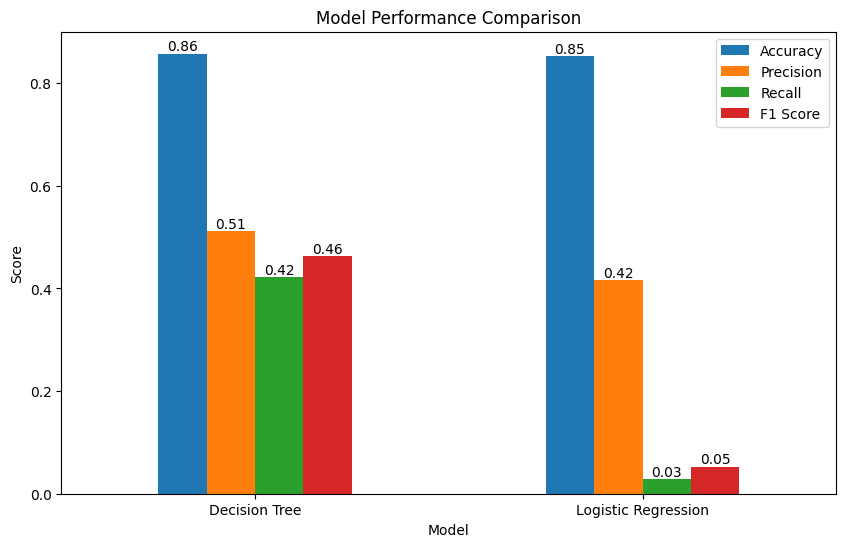

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming df_encoded is your processed DataFrame with encoded features and target variable
# Define features and target variable
X = df_encoded.drop(columns=['Accident_severity_Serious Injury', 'Accident_severity_Slight Injury'])
y = df_encoded['Accident_severity_Serious Injury']  # Select the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Train the models
dt_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Evaluate metrics
evaluation_metrics = {
    'Model': ['Decision Tree', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_test, dt_predictions), 
        accuracy_score(y_test, lr_predictions)
    ],
    'Precision': [
        precision_score(y_test, dt_predictions), 
        precision_score(y_test, lr_predictions)
    ],
    'Recall': [
        recall_score(y_test, dt_predictions), 
        recall_score(y_test, lr_predictions)
    ],
    'F1 Score': [
        f1_score(y_test, dt_predictions), 
        f1_score(y_test, lr_predictions)
    ]
}

# Convert to DataFrame to display the evaluation metrics
evaluation_df = pd.DataFrame(evaluation_metrics)

# Print the evaluation DataFrame
print(evaluation_df)

# Optional: Visualize the results
ax = evaluation_df.set_index('Model').plot(kind='bar', figsize=(10, 6), title='Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)  # Rotate x-axis labels to make them horizontal

# Add value labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.show()


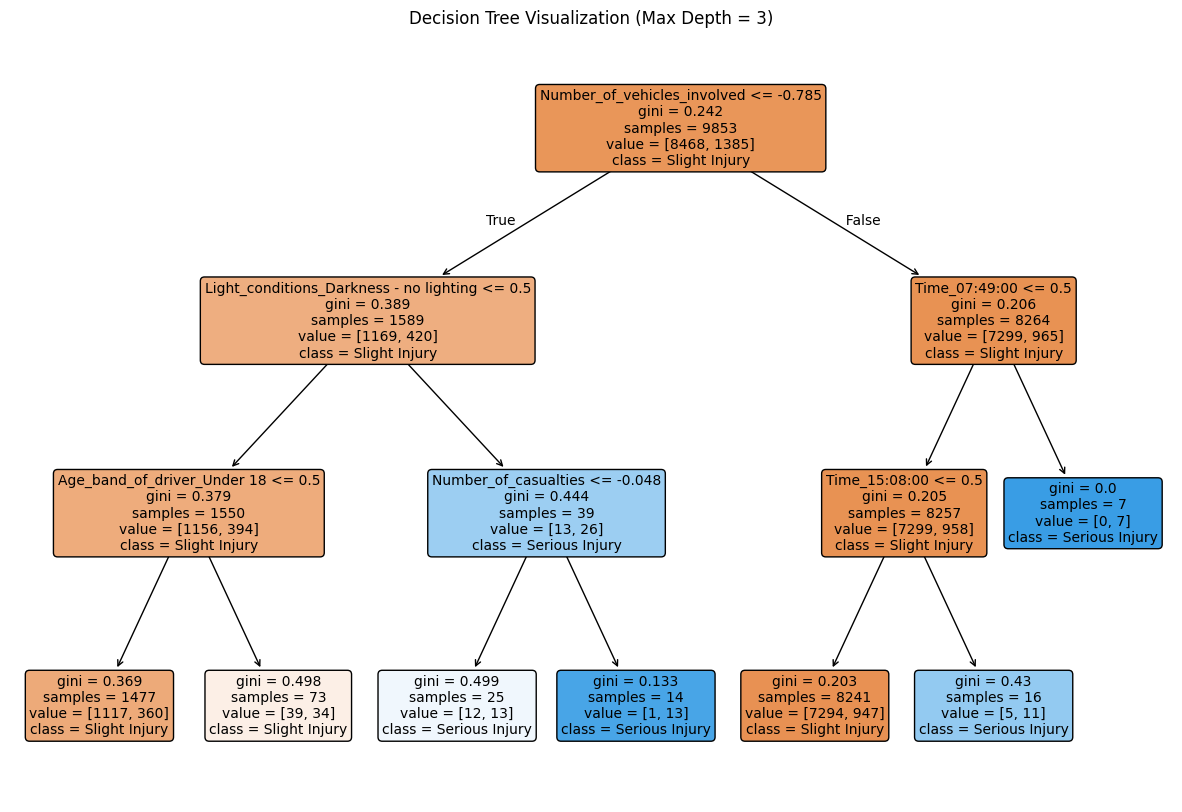

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize the Decision Tree model with a max depth
max_depth = 3  # Limit the depth to 3 to simplify the tree
dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Plotting the Decision Tree
plt.figure(figsize=(15, 10))  # Set the figure size
plot_tree(dt_model, 
          filled=True,          # Color the nodes
          feature_names=X.columns,  # Use the feature names
          class_names=['Slight Injury', 'Serious Injury'],  # Class names based on your target variable
          rounded=True,         # Round the corners of the boxes
          fontsize=10)         # Adjusted font size for readability

plt.title('Decision Tree Visualization (Max Depth = 3)')
plt.savefig('/Users/Wisani/Desktop/INF791-ASSIGN4/2ndTrial/decision_tree_visualization.png', bbox_inches='tight', format='png')
plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix,
    cohen_kappa_score
)
import time

# Load the processed dataset
processed_file_path = '/Users/Wisani/Desktop/INF791-ASSIGN4/2ndTrial/Processed_Accident_Data.xlsx'
df_encoded = pd.read_excel(processed_file_path)

# Define features and target variable
X = df_encoded.drop(columns=['Accident_severity_Serious Injury', 'Accident_severity_Slight Injury'])
y = df_encoded['Accident_severity_Slight Injury']  # Adjust if necessary

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
decision_tree = DecisionTreeClassifier(random_state=42)
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Train Decision Tree and measure time
start_time = time.time()
decision_tree.fit(X_train, y_train)
train_time_dt = time.time() - start_time

# Predict with Decision Tree
y_pred_dt = decision_tree.predict(X_test)

# Train Logistic Regression and measure time
start_time = time.time()
logistic_regression.fit(X_train, y_train)
train_time_lr = time.time() - start_time

# Predict with Logistic Regression
y_pred_lr = logistic_regression.predict(X_test)


In [15]:

# Calculate metrics for both models
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_true, y_pred)
    return accuracy, precision, recall, f1, kappa

# Metrics for Decision Tree
metrics_dt = calculate_metrics(y_test, y_pred_dt)
# Metrics for Logistic Regression
metrics_lr = calculate_metrics(y_test, y_pred_lr)

# ROC Curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# ROC Curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)



                 Model  Accuracy  Precision    Recall  F1 Score     Kappa  \
0        Decision Tree  0.843750   0.835130  0.843750  0.838879  0.380803   
1  Logistic Regression  0.842938   0.803033  0.842938  0.783510  0.069406   

   Train Time (s)   ROC AUC  
0        2.983497  0.679571  
1        1.313635  0.692873  


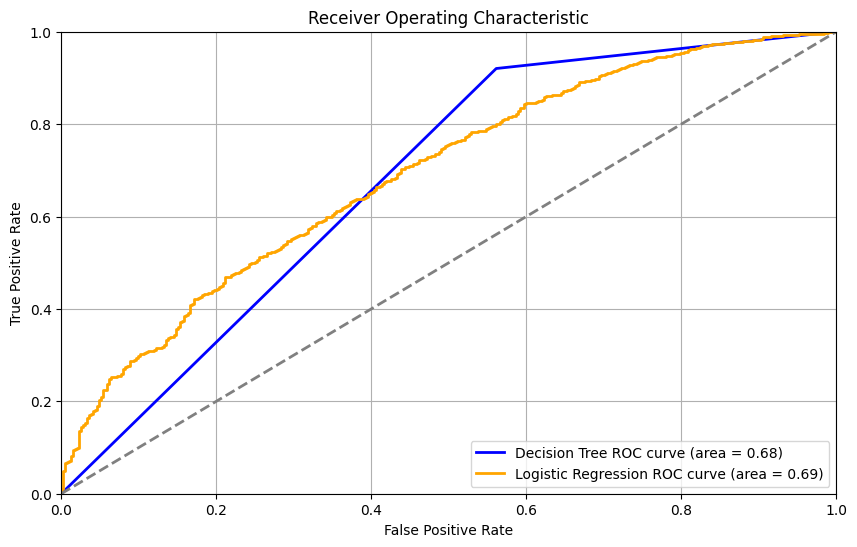

In [16]:
# Print the evaluation metrics
evaluation_metrics = {
    'Model': ['Decision Tree', 'Logistic Regression'],
    'Accuracy': [metrics_dt[0], metrics_lr[0]],
    'Precision': [metrics_dt[1], metrics_lr[1]],
    'Recall': [metrics_dt[2], metrics_lr[2]],
    'F1 Score': [metrics_dt[3], metrics_lr[3]],
    'Kappa': [metrics_dt[4], metrics_lr[4]],
    'Train Time (s)': [train_time_dt, train_time_lr],
    'ROC AUC': [roc_auc_dt, roc_auc_lr]
}

evaluation_df = pd.DataFrame(evaluation_metrics)
print(evaluation_df)

# Plotting ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_lr, tpr_lr, color='orange', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()


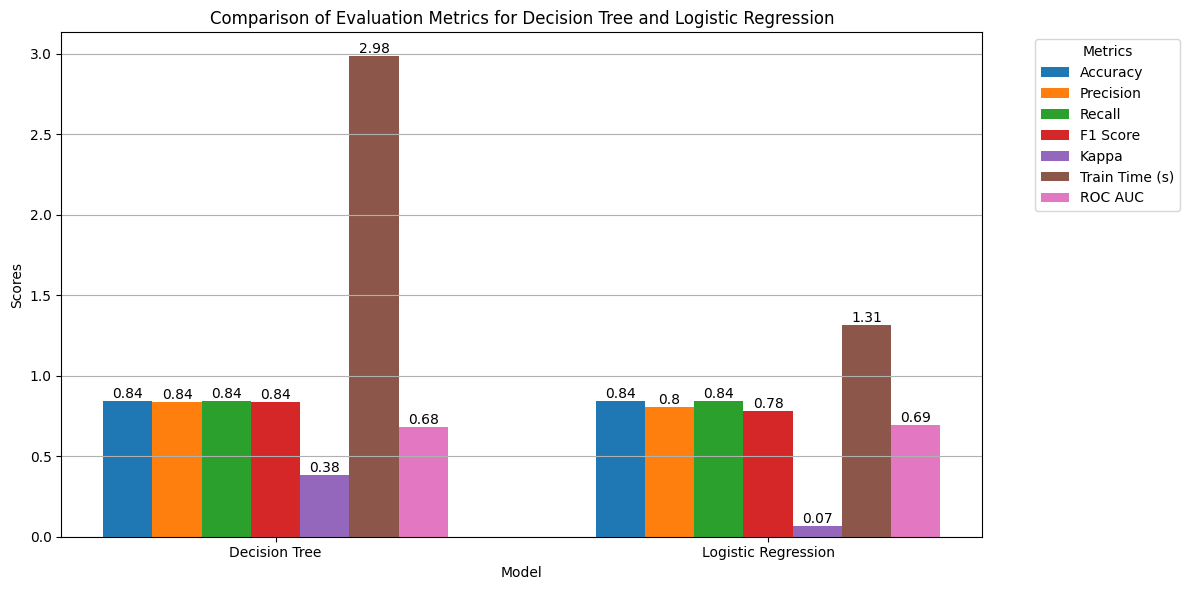

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df_metrics is already prepared as before
evaluation_metrics = {
    'Model': ['Decision Tree', 'Logistic Regression'],
    'Accuracy': [metrics_dt[0], metrics_lr[0]],
    'Precision': [metrics_dt[1], metrics_lr[1]],
    'Recall': [metrics_dt[2], metrics_lr[2]],
    'F1 Score': [metrics_dt[3], metrics_lr[3]],
    'Kappa': [metrics_dt[4], metrics_lr[4]],
    'Train Time (s)': [train_time_dt, train_time_lr],
    'ROC AUC': [roc_auc_dt, roc_auc_lr]
}

df_metrics = pd.DataFrame(evaluation_metrics)

metrics_names = df_metrics.columns[1:]  # Exclude 'Model' for metrics
num_metrics = len(metrics_names)
bar_width = 0.1  # Thinner bars
x = np.arange(len(df_metrics))  # The label locations for each model

fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for each model and add values above them
for i, metric in enumerate(metrics_names):
    bars = ax.bar(x + i * bar_width, df_metrics[metric], bar_width, label=metric)
    
    # Add value annotations above each bar
    for bar in bars:
        yval = bar.get_height()  # Get the height of the bar
        ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics for Decision Tree and Logistic Regression')
ax.set_xticks(x + bar_width * (num_metrics / 2 - 0.5))
ax.set_xticklabels(df_metrics['Model'])
ax.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add gridlines for better readability
ax.yaxis.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [18]:
##### XAI TECHNIQUES #####

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from lime.lime_tabular import LimeTabularExplainer

# Load your processed data
file_path = '/Users/Wisani/Desktop/INF791-ASSIGN4/2ndTrial/Processed_Accident_Data.xlsx'
df_encoded = pd.read_excel(file_path)

# Create feature set X and target variable y
# Create a binary target variable indicating severity (1 for Serious Injury, 0 for Slight Injury)
y = df_encoded[['Accident_severity_Serious Injury', 'Accident_severity_Slight Injury']].idxmax(axis=1)
y = y.replace({'Accident_severity_Serious Injury': 1, 'Accident_severity_Slight Injury': 0})

# Drop the target columns from the features
X = df_encoded.drop(columns=['Accident_severity_Serious Injury', 'Accident_severity_Slight Injury'])

# Train your Decision Tree model
max_depth = 3
model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
model.fit(X, y)

# Create LIME explainer
explainer = LimeTabularExplainer(X.values, 
                                  feature_names=X.columns, 
                                  class_names=['Slight Injury', 'Serious Injury'], 
                                  mode='classification')

# Select a single instance to explain
idx = 0  # Example index of a test instance
exp = explainer.explain_instance(X.values[idx], model.predict_proba)
exp.show_in_notebook(show_table=True, show_all=False)


/var/folders/g6/ddsw85fs74l44cyy37jg6t640000gn/T/ipykernel_10205/3496177051.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'Accident_severity_Serious Injury': 1, 'Accident_severity_Slight Injury': 0})
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import shap
from sklearn.tree import DecisionTreeClassifier

# Load your processed data
file_path = '/Users/Wisani/Desktop/INF791-ASSIGN4/2ndTrial/Processed_Accident_Data.xlsx'
df_encoded = pd.read_excel(file_path)

# Check for null values
if df_encoded.isnull().values.any():
    print("Null values found in the dataset. Please handle them before proceeding.")
    print(df_encoded.isnull().sum())
else:
    print("No null values in the dataset.")

# Create feature set X and target variable y
y = df_encoded[['Accident_severity_Serious Injury', 'Accident_severity_Slight Injury']].idxmax(axis=1)
y = y.replace({'Accident_severity_Serious Injury': 1, 'Accident_severity_Slight Injury': 0})

X = df_encoded.drop(columns=['Accident_severity_Serious Injury', 'Accident_severity_Slight Injury'])

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Check data types after conversion
print("Data types of X after one-hot encoding:")
print(X.dtypes)

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("Non-numeric columns found in X:", non_numeric_cols)

# Convert non-numeric columns to numeric if necessary
X = X.apply(pd.to_numeric, errors='coerce')

# Check for NaN values after conversion
if X.isnull().values.any():
    print("NaN values found in the dataset after conversion. Please handle them before proceeding.")
    print(X.isnull().sum())

# Ensure all features in X are numeric
if not np.issubdtype(X.values.dtype, np.number):
    print("Some features in X are still non-numeric after conversion.")

# Train your Decision Tree model
max_depth = 3
model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
model.fit(X, y)

# Create SHAP explainer
explainer = shap.Explainer(model, X)

# Calculate SHAP values
shap_values = explainer(X)

# Plot the SHAP values for the first instance
shap.initjs()
idx = 0  # Ensure this index is valid
shap.force_plot(explainer.expected_value, shap_values[idx], X.iloc[idx])

# Summary plot
shap.summary_plot(shap_values, X)


In [ ]:
from sklearn.inspection import plot_partial_dependence

# Plot PDP for a feature, e.g., 'Number_of_vehicles_involved'
features = ['Number_of_vehicles_involved', 'Number_of_casualties']
plot_partial_dependence(model, df_encoded, features)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_excel('/Users/Wisani/Desktop/INF791-ASSIGN4/2ndTrial/Processed_Accident_Data.xlsx')

# Create a binary target variable indicating severity (1 for Serious Injury, 0 for Slight Injury)
y = data['Accident_severity'].apply(lambda x: 1 if x == 'Serious Injury' else 0)

# Drop the target column from the features
X = data.drop(columns=['Accident_severity'])

# Encode categorical variables to numeric
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))

# Handle NaN values by dropping rows with any NaN values
X.dropna(inplace=True)
y = y[X.index]  # Align y with the cleaned X

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions and evaluate
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
lr_model.fit(X_train, y_train)

# Make predictions and evaluate
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

# Create Partial Dependence Plots for Decision Tree model
plt.figure(figsize=(12, 8))
features = ['Hour', 'Minute']  # List of features to create PDP for
PartialDependenceDisplay.from_estimator(dt_model, X_train, features, grid_resolution=50)
plt.title('Partial Dependence Plots for Decision Tree')
plt.savefig('/Users/preci/Documents/inf 791/Assignment4/visualizations/pdp_decision_tree.png', bbox_inches='tight')
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_excel('/Users/Wisani/Desktop/INF791-ASSIGN4/2ndTrial/Processed_Accident_Data.xlsx')

# Print column names to identify the target variable and features
print(data.columns)

# Replace 'Casualty_severity' with the actual name of your target variable
X = data.drop('Casualty_severity', axis=1)  # Use your actual target column name
y = data['Casualty_severity']  # Use your actual target column name

# Convert datetime columns to numerical features if any
if 'Time' in X.columns:
    X['Hour'] = X['Time'].apply(lambda x: x.hour if pd.notnull(x) else None)
    X['Minute'] = X['Time'].apply(lambda x: x.minute if pd.notnull(x) else None)
    X.drop('Time', axis=1, inplace=True)

# Encode categorical variables to numeric
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))

# Handle NaN values
X.dropna(inplace=True)
y = y[X.index]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# SHAP analysis
explainer = shap.TreeExplainer(dt_model)  # Use TreeExplainer for Decision Trees
shap_values = explainer.shap_values(X_test)

# Save summary plots
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.savefig("/Users/preci/Documents/inf 791/Assignment4/visualizations/shap_summary_plot.png", bbox_inches="tight")

plt.figure()
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig("/Users/preci/Documents/inf 791/Assignment4/visualizations/shap_detailed_summary.png", bbox_inches="tight")

# Make predictions and evaluate
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")